In [1]:
import re
from konlpy.tag import Mecab
import pandas as pd
from tqdm import tqdm

In [2]:
excel = pd.read_excel('../NewsResult.xlsx')
excel.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100701e+06,20220207,세계일보,이영균,"포항 앞바다서 선박 2척 충돌, 80대 어부 구조해 이송",지역>경북,지역>경남,지역>경기,NaN,NaN,NaN,NaN,"연안,경북,영일만항,포항,북구,용한항","포항해양경찰서,포항해경,포항시,승선","포항,앞바다,충돌,선박,구조,어부,이송,도선선,충돌,전복,어선,7일,포항해양경찰서,...","승선원,포항,앞바다,포항해양경찰서,경북,a호,포항해경,b호,저체온증,구조정,영일만항...",도선선과 충돌해 전복된 1t급 어선. 포항해양경찰서 제공 7일 오전 8시 8분쯤 경...,http://www.segye.com/content/html/2022/02/07/2...,NaN
1,1.101101e+06,20220207,한국일보,이동렬,"""군민 행복을 위한 행정의 변화 이어 갈 것""",지역>대전,지역>충북,지역>강원,범죄>기업범죄>거래제한,NaN,NaN,백,"상족암군립공원,양촌,고성,동계전지,경남도,고성군해양레저스포츠아카데미,독창,용정지구,...","삼호조선해양㈜,진로,삼강엠앤티,삼강엠앤티㈜,고성,바우처,경남고성공룡세계엑스포,부산은...","군민,행복,행정,변화,2022부울,메가시티,원년,경남,고성군,코로나,만에공룡세계엑스...","고성,대한민국,경남도,코로나,바우처,삼강엠앤티,지역경제,공룡엑스포,양촌,거점도시,고...","‘새로운 도약, 희망찬 고성’이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 ...",https://hankookilbo.com/News/Read/A20220126140...,NaN
2,1.600801e+06,20220207,전남일보,김진영,"""광양항 동북아 물류허브 육성"" 전남도, 대선공약 반영 '총력'",지역>전남,지역>충남,지역>경기,NaN,NaN,NaN,NaN,"전남도,광양,항만,동북아,류,광양시,광양항,도청","정부,전남도,항만,차기정부,국회,율촌,광양항","광양항,동북아,물류,허브,육성,전남도,총력,대선,공약,반영,광양항,활성,방안,건의,...","광양항,전남도,대선공약,배관망,동북아,활성화,벙커링,물동량,개정안,투기장,정치권,경...",전남도가 광양항을 '최첨단 동북아 물류허브'로 육성하는 '광양항 발전 및 활성화' ...,https://www.jnilbo.com/view/media/view?code=20...,NaN
3,1.101001e+06,20220207,한겨레,안태호 기자,"한국조선해양, 1조3848억 적자 전환 “통상임금 판결 철강재값 상승 탓”",경제>유통,경제>증권_증시,경제>부동산,NaN,NaN,NaN,NaN,조선,"현대중공업,현대두산인프라코어,현대삼호중공업,현대오일뱅크,현대건설기계,한국조선해양,현...","한국조선해양,1조,적자,전환,통상임금,판결,철강재값,상승,한국조선해양,1조,영업손실...","1조,충당금,한국조선해양,현대중공업,철강재,상반기,영업이익,지주사,현대중공업지주,통...",한국조선해양이 지난해 1조3848억원의 영업손실을 기록하면서 전년 대비 적자전환했다...,http://www.hani.co.kr/arti/economy/marketing/1...,NaN
4,2.100201e+06,20220207,머니투데이,정혜인|기자,"후쿠시마 오염수 내년 방류? IAEA, 14일 日 직접 가 검사한다",국제>일본,NaN,NaN,사고>산업사고>원자력사고,재해>자연재해>지진,NaN,"김흥석,구스타보","프랑스,미국,일본,중국,한국,후쿠시마","정부,아사히신문,원자력규제위원회,일본,국제원자력기구,IAEA,경제산업성,안전기술원,...","후쿠시마,오염수,내년,방류,IAEA,14일,검사,안전,예정,한국,구성,국제,전문가,...","오염수,일본,조사단,iaea,후쿠시마,원자력,안전성,해양방류,한국,전문가,국제전문가...",[머니투데이 정혜인 기자] [14~18일 안전성 살펴볼 예정 한국 등 국제전문가 1...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN


In [3]:
excel.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [4]:
newsdata = excel.drop(columns=['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)','URL', '분석제외 여부'])
newsdata

,본문
0,도선선과 충돌해 전복된 1t급 어선. 포항해양경찰서 제공 7일 오전 8시 8분쯤 경...
1,"‘새로운 도약, 희망찬 고성’이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 ..."
2,전남도가 광양항을 '최첨단 동북아 물류허브'로 육성하는 '광양항 발전 및 활성화' ...
3,한국조선해양이 지난해 1조3848억원의 영업손실을 기록하면서 전년 대비 적자전환했다...
4,[머니투데이 정혜인 기자] [14~18일 안전성 살펴볼 예정 한국 등 국제전문가 1...
...,...
12779,[세종=아시아경제 문채석 기자] 해양수산부는 구매액의 30%를 시장 온라인상품권으로...
12780,부산진해경자구역 웅동지구 개발지역 현장사진. 부산진해경제자유구역청 홈페이지 사진 캡...
12781,목포대(총장 박민서)는 송하철 조선해양공학과 교수가 4~5일 군산새만금컨벤션센터(G...
12782,"젓갈은 김치와 함께 한국을 대표하는 발효 음식으로, 지역 특산물을 사용하기에 향토색..."


In [5]:
newsdata['본문'] = newsdata['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/var/folders/9c/dyfvcxrx45d7q0h1vnt_h6p40000gn/T/ipykernel_11545/3670939450.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  newsdata['본문'] = newsdata['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [6]:
newsdata

,본문
0,도선선과 충돌해 전복된 급 어선 포항해양경찰서 제공 일 오전 시 분쯤 경북 포항시 ...
1,새로운 도약 희망찬 고성이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 행정의...
2,전남도가 광양항을 최첨단 동북아 물류허브로 육성하는 광양항 발전 및 활성화 대책을대...
3,한국조선해양이 지난해 조억원의 영업손실을 기록하면서 전년 대비 적자전환했다 철강재 ...
4,머니투데이 정혜인 기자 일 안전성 살펴볼 예정 한국 등 국제전문가 여명 구성 국제원...
...,...
12779,세종아시아경제 문채석 기자 해양수산부는 구매액의 를 시장 온라인상품권으로 돌려주는 ...
12780,부산진해경자구역 웅동지구 개발지역 현장사진 부산진해경제자유구역청 홈페이지 사진 캡처...
12781,목포대총장 박민서는 송하철 조선해양공학과 교수가 일 군산새만금컨벤션센터에서 열린 년...
12782,젓갈은 김치와 함께 한국을 대표하는 발효 음식으로 지역 특산물을 사용하기에 향토색이...


In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','로','등']

In [8]:
tokenizer = Mecab(dicpath='/Users/yhkoo/mecab-ko-dic-2.0.3-20170922')

In [9]:
tokenized_data = []
for sentence in tqdm(newsdata['본문']):
    tokenized_sentence = tokenizer.morphs(sentence) # 토큰화
    stopwords_setence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_setence)

100%|██████████| 12784/12784 [00:02<00:00, 5695.01it/s]


In [10]:
tokenized_data

[['도선',
  '선',
  '충돌',
  '해',
  '전복',
  '된',
  '급',
  '어선',
  '포항',
  '해양경찰',
  '서',
  '제공',
  '일',
  '오전',
  '시',
  '분',
  '쯤',
  '경북',
  '포항시',
  '북구',
  '영일',
  '만항',
  '북방',
  '파제',
  '앞바다',
  '에서',
  '급',
  '도선',
  '선',
  '호',
  '승선원',
  '명',
  '급',
  '어선',
  '호',
  '승선원',
  '명가',
  '충돌',
  '했',
  '다',
  '포항',
  '해양',
  '경찰서',
  '따르',
  '면',
  '사고',
  '호',
  '선장',
  '인',
  '대',
  '씨',
  '바다',
  '추락',
  '했',
  '다가',
  '호',
  '승선원',
  '의해',
  '구조',
  '됐',
  '다',
  '포항',
  '해경',
  '연안',
  '구',
  '조정'],
 ['새로운',
  '도약',
  '희망찬',
  '고성',
  '라는',
  '군정',
  '슬로건',
  '군민',
  '행복',
  '을',
  '위해',
  '끊임',
  '없',
  '행정',
  '변화',
  '모색',
  '해',
  '온',
  '백두현',
  '고성',
  '군수',
  '새로운',
  '변화',
  '요구',
  '하',
  '새로운',
  '시대',
  '살아남',
  '기',
  '위해서',
  '군민',
  '일상',
  '곳곳',
  '에서',
  '고성',
  '변화',
  '성장',
  '을',
  '체감',
  '할',
  '수',
  '있',
  '어야',
  '한다며',
  '올해',
  '군정',
  '목표',
  '고성',
  '지속',
  '가능',
  '발전',
  '해답',
  '을',
  '찾',
  '기',
  '위한',
  '변화',
  '하',
  '행정',
  '라고',
  '밝혔',
  '다',


In [11]:
from matplotlib import pyplot as plt

리뷰의 최대 길이 : 92
리뷰의 평균 길이 : 63.31148310387985


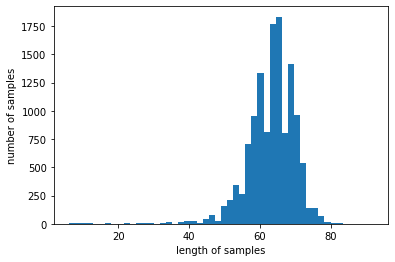

In [12]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
# Word2Vec과 비슷함(라이브러리만 변경하면됨)
# FastText의 장점은 Word2Vec과 달리 OOV(Out Of Vocabulary) 처리가 가능
from gensim.models import FastText

model = FastText(sentences = tokenized_data, vector_size= 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [14]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(10108, 100)

In [15]:
print(model.wv.most_similar("해운"))

[('업계', 0.7944415807723999), ('시황', 0.7648897767066956), ('수출입', 0.7370461225509644), ('해운법', 0.7329250574111938), ('해외', 0.7305045127868652), ('파산', 0.7224285006523132), ('해운업', 0.7155026197433472), ('석유공사', 0.715194046497345), ('비스', 0.7020562291145325), ('상거래', 0.693239152431488)]


In [16]:
print(model.wv.most_similar("항만"))

[('항만법', 0.9759302735328674), ('인천항', 0.758163571357727), ('울산항', 0.7570253610610962), ('부산항', 0.7488446235656738), ('군산항', 0.6828216314315796), ('터미널', 0.6796754002571106), ('물류', 0.6785768270492554), ('평택항', 0.6772297024726868), ('부두', 0.6636768579483032), ('배후', 0.6628168225288391)]


In [21]:
print(model.wv.most_similar("대통령"))

[('대통령상', 0.9913976788520813), ('통령', 0.9611186981201172), ('문재인', 0.9414365887641907), ('부통령', 0.9319106340408325), ('문재', 0.895327091217041), ('문', 0.8791465759277344), ('송재인', 0.843484103679657), ('청와대', 0.8325724005699158), ('여사', 0.8266773223876953), ('자신', 0.826111376285553)]


In [18]:
print(model.wv.similarity('항만','해운'))
print(model.wv.most_similar(positive=['항만','해운'], negative=['어종','건설'], topn=1))

0.51507545
[('항만법', 0.4002406895160675)]


In [ ]:
# 시각화를 원한다면 vis
# python -m gensim.scripts.word2vec2tensor --input fasttext_vis --output fasttext_vis